*Student Full Name: Derly Milded Montealegre Gonzalez 
*Student Number: 2024151 
*Module Title: Statistical Techniques for Data Analysis
*Assessment Title: CA 1 
*Assessment Due Date: 20 March 2024 
*Date of Submission: 21 April 2024

# Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

# Reading the Data

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type

In [2]:
missing_value_formats = ["?","NA","Na","NaN.",".NaN","NaN","nA","na","n.a","n.a.","Î´Öª",".n.a","n/a","nan","--","UnKnown"]
data = pd.read_csv('new.csv', encoding="latin1", na_values=missing_value_formats)

In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,1.010000e+11,116.475489,40.019520,1.110000e+12,09/08/2016,1464,106,415.0,31680,...,1.0,2005.0,3,6,0.217,1,0,1,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,1.010000e+11,116.453917,39.881534,1.110000e+12,28/07/2016,903,126,575.0,43436,...,1.0,2004.0,4,6,0.667,1,1,0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,1.010000e+11,116.561978,39.877145,1.110000e+12,11/12/2016,1271,48,1030.0,52021,...,4.0,2005.0,3,6,0.500,1,0,0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,1.010000e+11,116.438010,40.076114,1.110000e+12,30/09/2016,965,138,297.5,22202,...,1.0,2008.0,1,6,0.273,1,0,0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,1.010000e+11,116.428392,39.886229,1.110000e+12,28/08/2016,927,286,392.0,48396,...,4.0,1960.0,2,2,0.333,0,1,1,1,62588.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27591 entries, 0 to 27590
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  27591 non-null  object 
 1   id                   27591 non-null  float64
 2   Lng                  27591 non-null  float64
 3   Lat                  27591 non-null  float64
 4   Cid                  27591 non-null  float64
 5   tradeTime            27591 non-null  object 
 6   DOM                  27591 non-null  int64  
 7   followers            27591 non-null  int64  
 8   totalPrice           27591 non-null  float64
 9   price                27591 non-null  int64  
 10  square               27591 non-null  float64
 11  livingRoom           27591 non-null  int64  
 12  drawingRoom          27591 non-null  int64  
 13  kitchen              27591 non-null  int64  
 14  bathRoom             27591 non-null  int64  
 15  floor                27591 non-null 

In [5]:
data.describe()

,id,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,2.759100e+04,27591.000000,27591.000000,2.759100e+04,27591.000000,27591.000000,27591.000000,27591.000000,27591.000000,27591.000000,...,27336.000000,26819.000000,27591.000000,27591.000000,27591.000000,27591.000000,27591.000000,27591.000000,27591.000000,27564.000000
mean,1.010000e+11,116.411108,39.949670,1.156239e+12,69.608640,33.422602,439.938371,53000.136385,86.177041,2.049545,...,3.000183,1999.892688,3.298213,4.515422,0.381797,0.592222,0.539850,0.609474,6.652314,64330.588195
std,0.000000e+00,0.109037,0.097142,2.315377e+12,75.915084,43.944109,270.546781,22010.317830,42.195596,0.827781,...,1.270639,8.906394,0.931552,1.885651,0.192300,0.491430,0.498418,0.487877,2.743311,23108.737818
min,1.010000e+11,116.072514,39.627030,1.110000e+12,1.000000,0.000000,1.000000,117.000000,11.500000,0.000000,...,1.000000,1944.000000,1.000000,1.000000,0.014000,0.000000,0.000000,0.000000,1.000000,20483.000000
25%,1.010000e+11,116.343245,39.891990,1.110000e+12,21.000000,9.000000,270.000000,36350.500000,58.365000,1.000000,...,1.000000,1994.000000,3.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46120.000000
50%,1.010000e+11,116.416187,39.935122,1.110000e+12,47.000000,20.000000,378.000000,48164.000000,75.620000,2.000000,...,4.000000,2002.000000,4.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59488.000000
75%,1.010000e+11,116.472797,40.005811,1.110000e+12,93.000000,41.000000,525.000000,66187.500000,100.970000,3.000000,...,4.000000,2006.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,77695.000000
max,1.010000e+11,116.732378,40.251337,1.180000e+14,1464.000000,1000.000000,6000.000000,150000.000000,586.000000,9.000000,...,4.000000,2016.000000,4.000000,6.000000,10.000000,1.000000,1.000000,1.000000,13.000000,183109.000000


# Preprocesing the data

### Dropping irrelevant features

Some features are logicaly irrelevants to the independant variable such as: id, url and floor therefore we drop them

In [6]:
data.drop(['id', 'url', 'floor', 'tradeTime'], axis=1, inplace=True)

# Calculate the number of missing values per variable

In [7]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

# Missing values graph

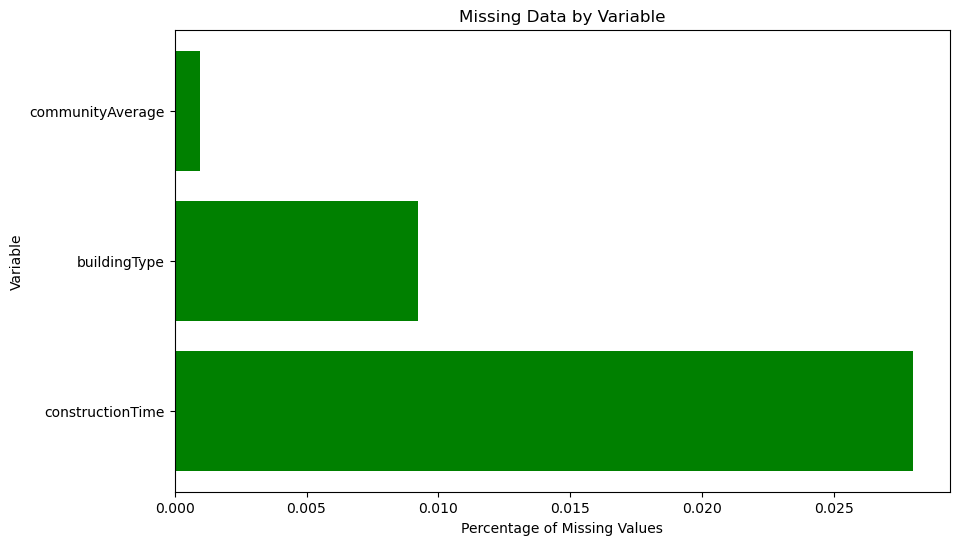

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the 'buildingType', 'communityAverage', 'constructionTime'column,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [9]:
data[['buildingType', 'communityAverage', 'constructionTime']].describe() 

,buildingType,communityAverage,constructionTime
count,27336.000000,27564.000000,26819.000000
mean,3.000183,64330.588195,1999.892688
std,1.270639,23108.737818,8.906394
min,1.000000,20483.000000,1944.000000
25%,1.000000,46120.000000,1994.000000
50%,4.000000,59488.000000,2002.000000
75%,4.000000,77695.000000,2006.000000
max,4.000000,183109.000000,2016.000000


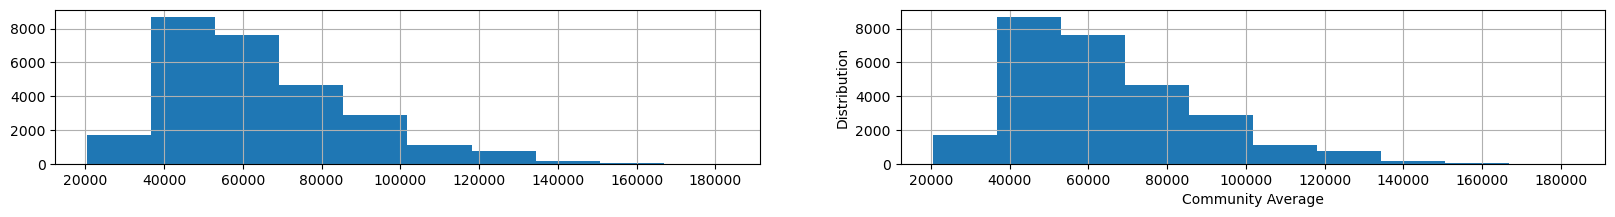

In [10]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()


Using the median of the existing values in the buildingType,communityAverage column to replace missing values

In [11]:
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

Identifying which columns have missing values

In [12]:
data.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

## Data standardization

In [13]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)

C:\Users\monte\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [14]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [15]:
data_scaled['price'] = data['price']
data = data_scaled

data

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,0.590457,0.719062,-0.019971,18.368110,1.651614,-0.092179,31680,1.062286,-0.059854,-0.312974,...,-1.584289,0.581649,-0.320131,0.787317,-0.856996,0.829793,-1.083145,0.800474,0.126742,-0.359769
1,0.392613,-0.701425,-0.019971,10.978141,2.106746,0.499226,43436,1.094991,-0.059854,1.444306,...,-1.584289,0.467763,0.753366,0.787317,1.483145,0.829793,0.923237,-1.249260,0.126742,0.312093
2,1.383678,-0.746608,-0.019971,15.825750,0.331732,2.181036,52021,2.650158,1.148216,1.444306,...,0.781000,0.581649,-0.320131,0.787317,0.614693,0.829793,-1.083145,-1.249260,0.126742,-0.700116
3,0.246724,1.301666,-0.019971,11.794857,2.379825,-0.526493,22202,1.133384,1.148216,-0.312974,...,-1.584289,0.923306,-2.467125,0.787317,-0.565778,0.829793,-1.083145,-1.249260,-0.237788,-0.566852
4,0.158514,-0.653093,-0.019971,11.294289,5.747801,-0.177194,48396,-0.122694,-0.059854,-0.312974,...,0.781000,-4.543201,-1.393628,-1.334005,-0.253760,-1.205120,0.923237,0.800474,-2.060436,-0.075446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27586,1.017989,-0.282308,-0.019971,0.215921,0.354488,-0.276994,52143,-0.383389,-0.059854,-0.312974,...,-0.007430,0.126107,-0.320131,0.787317,-0.253760,0.829793,-1.083145,-1.249260,0.126742,-0.447529
27587,0.440937,0.105833,-0.019971,-0.508586,0.058653,-0.155016,64350,-0.576541,-0.059854,-0.312974,...,0.781000,-2.037719,0.753366,0.787317,-0.685386,-1.205120,-1.083145,0.800474,0.126742,0.003135
27588,0.724698,-0.300817,-0.019971,-0.653487,-0.555775,-0.554215,41429,-0.383389,-0.059854,-0.312974,...,0.781000,-1.582176,-0.320131,-0.273344,-0.253760,-1.205120,0.923237,-1.249260,0.126742,-0.370290
27589,-0.636028,-1.997968,-0.019971,0.268612,0.104166,0.480745,39042,1.417779,1.148216,1.444306,...,-0.007430,0.923306,-0.320131,0.787317,0.094662,0.829793,-1.083145,0.800474,-0.966847,-0.771770


In [16]:
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != 'price']
y = data.loc[:, 'price']

X,y

(            Lng       Lat       Cid        DOM  followers  totalPrice  \
 0      0.590457  0.719062 -0.019971  18.368110   1.651614   -0.092179   
 1      0.392613 -0.701425 -0.019971  10.978141   2.106746    0.499226   
 2      1.383678 -0.746608 -0.019971  15.825750   0.331732    2.181036   
 3      0.246724  1.301666 -0.019971  11.794857   2.379825   -0.526493   
 4      0.158514 -0.653093 -0.019971  11.294289   5.747801   -0.177194   
 ...         ...       ...       ...        ...        ...         ...   
 27586  1.017989 -0.282308 -0.019971   0.215921   0.354488   -0.276994   
 27587  0.440937  0.105833 -0.019971  -0.508586   0.058653   -0.155016   
 27588  0.724698 -0.300817 -0.019971  -0.653487  -0.555775   -0.554215   
 27589 -0.636028 -1.997968 -0.019971   0.268612   0.104166    0.480745   
 27590  1.016916 -0.228973 -0.019971  -0.693006  -0.715071   -0.258512   
 
          square  livingRoom  drawingRoom   kitchen  ...  buildingType  \
 0      1.062286   -0.059854    -0.3

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22072, 21), (5519, 21), (22072,), (5519,))

# Model Linear Regression

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
X = data.drop('price', axis=1)
y = data['price']

In [21]:
test_sizes = [0.2, 0.25, 0.3]

In [22]:
r2_scores = []

In [23]:
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
for i, test_size in enumerate(test_sizes):
    print(f"R2 score for test size {test_size}: {r2_scores[i]}")

R2 score for test size 0.2: 0.9081270157510535
R2 score for test size 0.25: 0.909452873838538
R2 score for test size 0.3: 0.9112086240501861


# Random Forest

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [25]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

In [26]:
model = RandomForestClassifier(n_estimators=50, max_depth=5)
model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [27]:
X_train_sampled, y_train_sampled = resample(X_train_selected, y_train, n_samples=1000)

In [28]:
model.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [29]:
X_test_selected = selector.transform(X_test)
y_pred = model.predict(X_test_selected)

print("Testing Accuracy:", model.score(X_test_selected, y_test))

Testing Accuracy: 0.000724812756704518


# Model building

In [30]:
! pip install tensorflow

In [31]:
import numpy as np
import random
import tensorflow
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [32]:
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network model definition

In [34]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\monte\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model compilation

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model training

In [36]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0000e+00 - loss: -238092448.0000
Epoch 2/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0000e+00 - loss: -19489013760.0000
Epoch 3/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -165492670464.0000
Epoch 4/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: -605395091456.0000
Epoch 5/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: -1509153308672.0000
Epoch 6/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0000e+00 - loss: -3035392901120.0000
Epoch 7/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -5339871707136.0000
Epoch 8/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: -8580723376128.0000
Epoch 9/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -12921630359552.0000
Epoch 10/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.000

690/690 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0000e+00 - loss: -7670807295688704.0000
Epoch 60/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0000e+00 - loss: -8140621957038080.0000
Epoch 61/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -8631233386905600.0000
Epoch 62/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: -9143234827649024.0000
Epoch 63/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: -9677234554011648.0000
Epoch 64/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: -10233821513383936.0000
Epoch 65/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: -10813578747576320.0000
Epoch 66/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0000e+00 - loss: -11417146206715904.0000
Epoch 67/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -12045162767187968.0000
Epoch 68/100
690/690 ━━━━━━━━━━━━━━━━

# Results analysis
#### Having successfully trained our MLP, let's evaluate our model based on the testing accuracy, confusion matrix, and receiver operating characteristic (ROC) curve.

# Testing accuracy

In [37]:
train_scores = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: %.2f%%" % (train_scores[1]*100))

Training Accuracy: 0.00%


In [38]:
test_scores = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: %.2f%%" % (test_scores[1]*100))

Testing Accuracy: 0.00%


The accuracy is 89.25% and 80.52% on the training set and testing set respectively. The difference in accuracy between the training and testing set isn't surprising since the model was trained on the training set.

## Hyperparameters

In [39]:
import numpy as np
neighbors = np.arange(1, 11)                  
train_accuracy = np.zeros(len(neighbors))     
test_accuracy = np.zeros(len(neighbors))

In [40]:
for i, k in enumerate(neighbors):
       kNN = KNeighborsClassifier(n_neighbors = k) 

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
kNN.fit(X_train, y_train)

In [ ]:
train_accuracy[i] = kNN.score(X_train, y_train)

In [ ]:
test_accuracy[i] = kNN.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
graficar la matrix de confusion

Calculating the accuracy of the SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

# Calculating the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM: {accuracy_svm:.2f}')

Plotting the accuracy of the SVM model

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(['Naive Bayes', 'Random Forest', 'SVM'], [accuracy, accuracy_rf, accuracy_svm], color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()

In [ ]:
Plotting the distribution of predictions by SVM

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(y_pred_svm)
plt.title('Distribution of Predicted Classes by SVM')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Conclusion

The methodology involves segmentation to identify areas of abandonment based on year of construction and renovation history. Additionally, the study uses support vector machine (SVM) models to predict house prices, considering factors such as location, size, and age of the property.

# Reference

Housing price of Beijing from 2011 to 2017, fetching from https://www.kaggle.com/datasets/ruiqurm/lianjia

Alberca, A. S. (2020, October 4). La librería Matplotlib | Aprende con Alf.
Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/matplotlib/

Kuzminska, O. (2021). Selecting tools to enhance scholarly communication through the life cycle of scientific research. Educational Technology Quarterly, 2021(3), 402–414. https://doi.org/10.55056/etq.19
